In [ ]:
"""Bollinger Bands."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + 2*(rstd)
    lower_band = rm - 2*(rstd)
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    test_run()

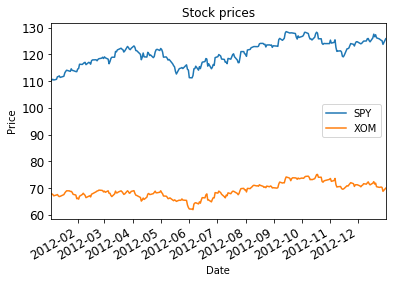

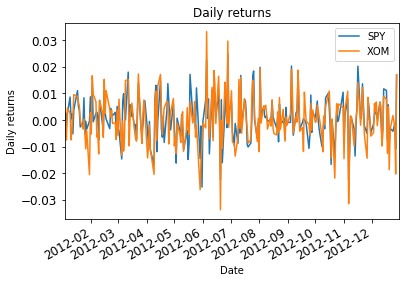

In [26]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="."):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    d_returns = df.copy()
    d_returns[1:] = (df[1:].values / df[:-1]) - 1
    d_returns.iloc[0, :] = 0
    return d_returns

def compute_cumulative_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    d_returns = df.copy()
    d_returns[1:] = (df[1:].values / df[:-1]) - 1
    d_returns.iloc[0, :] = 0
    return d_returns


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_cumulative_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()


In [15]:
prices = pd.DataFrame([1035.23, 1032.47, 1011.78, 1010.59, 1016.03, 1007.95, 
              1022.75, 1021.52, 1026.11, 1027.04, 1030.58, 1030.42,
              1036.24, 1015.00, 1015.20])
print(prices)
print(prices[:-1])
print(prices[1:])

          0
0   1035.23
1   1032.47
2   1011.78
3   1010.59
4   1016.03
5   1007.95
6   1022.75
7   1021.52
8   1026.11
9   1027.04
10  1030.58
11  1030.42
12  1036.24
13  1015.00
14  1015.20
          0
0   1035.23
1   1032.47
2   1011.78
3   1010.59
4   1016.03
5   1007.95
6   1022.75
7   1021.52
8   1026.11
9   1027.04
10  1030.58
11  1030.42
12  1036.24
13  1015.00
          0
1   1032.47
2   1011.78
3   1010.59
4   1016.03
5   1007.95
6   1022.75
7   1021.52
8   1026.11
9   1027.04
10  1030.58
11  1030.42
12  1036.24
13  1015.00
14  1015.20


In [11]:
prices[1:] - 1

,0
1,1031.47
2,1010.78
3,1009.59
4,1015.03
5,1006.95
6,1021.75
7,1020.52
8,1025.11
9,1026.04
10,1029.58


In [20]:
prices[:-1] / prices[1:]

,0
0,NaN
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [21]:
prices[:-1].values / prices[1:]

,0
1,1.002673
2,1.020449
3,1.001178
4,0.994646
5,1.008016
6,0.985529
7,1.001204
8,0.995527
9,0.999094
10,0.996565
